In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler

In [6]:
# Get data
data_path = "../../data/preprocessed/type/w2v_test.csv"
df = pd.read_csv(data_path)
pca = PCA(n_components=3)
# Standardize the data
scaler = StandardScaler()

pca.fit(scaler.fit_transform(df.drop(columns=["Type"])))
X_pca = pca.transform(scaler.fit_transform(df.drop(columns=["Type"])))

In [7]:
%matplotlib widget


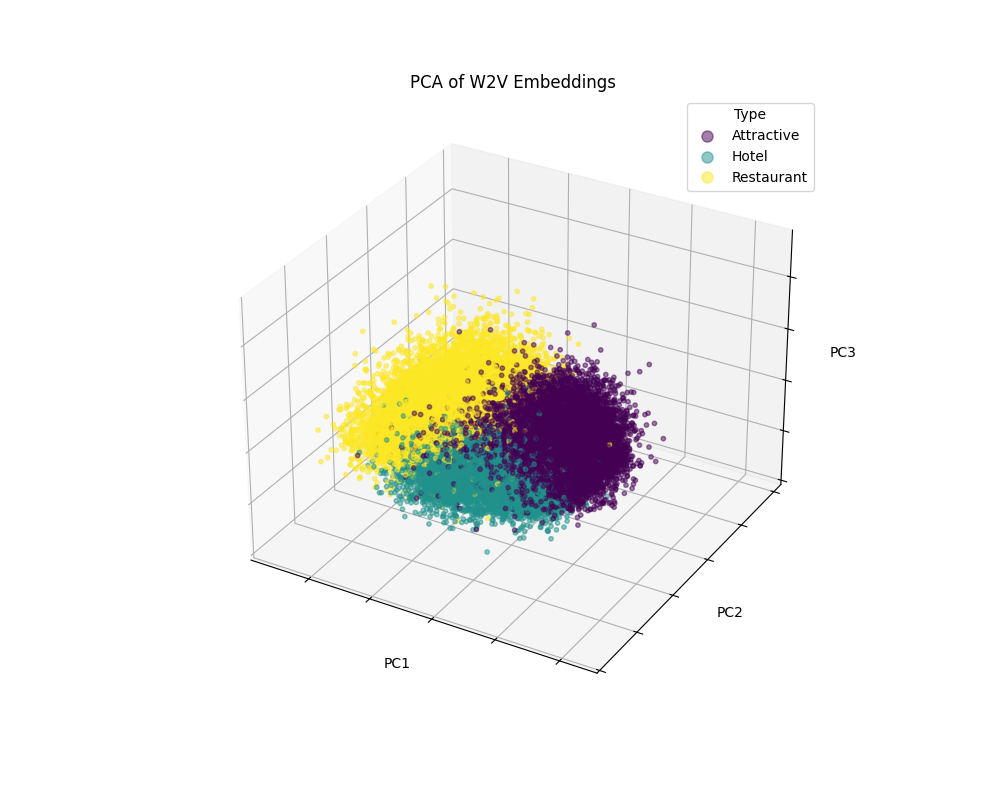

In [8]:
# Plot in 3D
representation = "W2V Embeddings"
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Convert 'Type' to categorical codes for coloring
# This also gives us an ordered list of unique category names
type_categorical = df["Type"].astype('category')
type_codes = type_categorical.cat.codes
unique_type_names = type_categorical.cat.categories.tolist()

# Your scatter plot
# Note: The scatter_plot variable itself is not strictly needed for this legend solution
scatter_plot = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                          c=type_codes,  # Use the numerical codes for coloring
                          cmap='viridis', 
                          s=10, 
                          alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.title(f'PCA of {representation}')

# Create proxy artists for the legend
handles = []
# Get the colormap
cmap = plt.get_cmap('viridis')
# Create a normalizer for the category codes (0 to N-1)
if len(unique_type_names) > 1:
    norm = plt.Normalize(vmin=0, vmax=len(unique_type_names) - 1)
else: # Handle case with only one category
    norm = plt.Normalize(vmin=0, vmax=0)


for i, type_name in enumerate(unique_type_names):
    # 'i' here corresponds to the numerical code for 'type_name'
    color = cmap(norm(i))
    proxy_artist = Line2D([0], [0], # Dummy data points
                          linestyle='None', # No line, just the marker
                          marker='o', 
                          markersize=8, # Adjust size as needed
                          markerfacecolor=color,
                          markeredgecolor=color, # Optional: match facecolor or set to 'k'
                          alpha=0.5, # Match alpha of scatter points
                          label=type_name)
    handles.append(proxy_artist)

# Add the legend to the plot using the created handles
ax.legend(handles=handles, title="Type", loc='upper right')

plt.show()